# Loading packages

In [2]:
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_focal.sh", "add_cranapt_focal.sh")
Sys.chmod("add_cranapt_focal.sh", "0755")
system("./add_cranapt_focal.sh")

In [1]:
library(tidyverse)
library(readr)
library(stringr)
install.packages("modeest")
library(modeest)
install.packages("gridExtra")
library(grid)
library(gridExtra)
install.packages("ggthemes")
library(ggthemes)
install.packages("remotes")
remotes::install_github("ltorgo/DMwR2", ref = "develop")
install.packages("DMwR2")
library(DMwR2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Skipping install of 'DMwR2' from a github remote, the SHA1 (c19cb087) has not changed since last install.
  Use `force = TRUE` to force installation

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# Loading data

In [117]:
Car_df = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/New_York_cars.csv")
Car_rates = read_csv("https://raw.githubusercontent.com/NitoBoritto/R_New_York_Car_Project/main/Car_Rates.csv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1068 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): <!DOCTYPE html>

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1068 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): <!DOCTYPE html>

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
Car_df %>% head(3)

new&used,name,money,Exterior color,Interior color,Drivetrain,MPG,Fuel type,Transmission,Engine,⋯,Safety,Seating,Accidents or damage,Clean title,1-owner vehicle,Personal use only,brand,Year,Model,currency
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
New,2023 Acura Integra Base,33095,Liquid Carbon Metallic,Ebony,Fwd,30–37,Gasoline,Automatic Cvt,1.5L I4 16V Gdi Dohc Turbo,⋯,Automatic Emergency BrakingBackup CameraBrake AssistLane Departure WarningRear Cross Traffic AlertStability Control,Leather Seats,NA,NA,NA,NA,Acura,2023,Integra Base,$
New,2023 Acura Mdx A-Spec,61745,Majestic Black Pearl,Ebony,Awd,19–25,Gasoline,10-Speed Automatic,3.5L V6 24V Gdi Sohc,⋯,Backup CameraBrake AssistLane Departure WarningStability Control,Leather SeatsMemory SeatThird Row Seating,NA,NA,NA,NA,Acura,2023,Mdx A-Spec,$
New,2023 Acura Integra A-Spec Technology,38095,Majestic Black Pearl,Ebony,Fwd,26–36,Gasoline,6-Speed Manual,1.5L I4 16V Gdi Dohc Turbo,⋯,Backup CameraBrake AssistLane Departure WarningStability Control,Leather SeatsMemory Seat,NA,NA,NA,NA,Acura,2023,Integra A-Spec Technology,$


In [5]:
Car_df %>% str()

spc_tbl_ [175,490 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ new&used           : chr [1:175490] "New" "New" "New" "New" ...
 $ name               : chr [1:175490] "2023 Acura Integra Base" "2023 Acura Mdx A-Spec" "2023 Acura Integra A-Spec Technology" "2023 Acura Tlx A-Spec" ...
 $ money              : num [1:175490] 33095 61745 38095 47995 47995 ...
 $ Exterior color     : chr [1:175490] "Liquid Carbon Metallic" "Majestic Black Pearl" "Majestic Black Pearl" "Majestic Black Pearl" ...
 $ Interior color     : chr [1:175490] "Ebony" "Ebony" "Ebony" "Ebony" ...
 $ Drivetrain         : chr [1:175490] "Fwd" "Awd" "Fwd" "Fwd" ...
 $ MPG                : chr [1:175490] "30–37" "19–25" "26–36" "22–30" ...
 $ Fuel type          : chr [1:175490] "Gasoline" "Gasoline" "Gasoline" "Gasoline" ...
 $ Transmission       : chr [1:175490] "Automatic Cvt" "10-Speed Automatic" "6-Speed Manual" "10-Speed Automatic" ...
 $ Engine             : chr [1:175490] "1.5L I4 16V Gdi Dohc Turbo" "3.5L V6 24V 

In [6]:
Car_rates %>% head()

Car_name,Num_of_reviews,General_rate,Comfort,Interior design,Performance,Value for the money,Exterior styling,Reliability,Year,Brand,Model
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2023 Acura Integra.,5,4.6,4.4,4.4,4.6,4.2,5.0,4.8,2023,Acura,Integra.
2023 Acura MDX.,NA,NA,NA,NA,NA,NA,NA,NA,2023,Acura,MDX.
2023 Acura TLX.,NA,NA,NA,NA,NA,NA,NA,NA,2023,Acura,TLX.
2023 Acura RDX.,NA,NA,NA,NA,NA,NA,NA,NA,2023,Acura,RDX.
2022 Acura TLX.,3,4.8,4.3,4.3,4.7,5.0,5.0,5.0,2022,Acura,TLX.
2022 Acura MDX.,19,4.7,4.8,4.6,4.7,4.6,4.9,4.6,2022,Acura,MDX.


In [7]:
Car_rates %>% str()

spc_tbl_ [4,243 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Car_name           : chr [1:4243] "2023     Acura     Integra." "2023     Acura     MDX." "2023     Acura     TLX." "2023     Acura     RDX." ...
 $ Num_of_reviews     : num [1:4243] 5 NA NA NA 3 19 2 NA NA 3 ...
 $ General_rate       : num [1:4243] 4.6 NA NA NA 4.8 4.7 4.8 NA NA 4.9 ...
 $ Comfort            : num [1:4243] 4.4 NA NA NA 4.3 4.8 5 NA NA 4.7 ...
 $ Interior design    : num [1:4243] 4.4 NA NA NA 4.3 4.6 5 NA NA 4.7 ...
 $ Performance        : num [1:4243] 4.6 NA NA NA 4.7 4.7 4.5 NA NA 5 ...
 $ Value for the money: num [1:4243] 4.2 NA NA NA 5 4.6 5 NA NA 5 ...
 $ Exterior styling   : num [1:4243] 5 NA NA NA 5 4.9 4.5 NA NA 4.7 ...
 $ Reliability        : num [1:4243] 4.8 NA NA NA 5 4.6 5 NA NA 5 ...
 $ Year               : num [1:4243] 2023 2023 2023 2023 2022 ...
 $ Brand              : chr [1:4243] "Acura" "Acura" "Acura" "Acura" ...
 $ Model              : chr [1:4243] "Integra." "MDX." "TLX." "RDX." ...


# Preprocessing

## Checking Duplicates

In [8]:
Dups_Car = Car_df %>%
  duplicated() %>%
  sum()
sprintf("Duplicates in Car dataset before: %d", Dups_Car)

Dups_rate = Car_rates %>%
  duplicated() %>%
  sum()
sprintf("Duplicates in Rate dataset: %d", Dups_rate)

[1] "Duplicates in Car dataset before: 302"

[1] "Duplicates in Rate dataset: 0"

In [9]:
# Deleting empty rows
Car_df = Car_df %>% distinct()

Dups_Car_00 = Car_df %>%
  duplicated() %>%
  sum()
sprintf("Duplicates in Car dataset after: %d", Dups_Car_00)

[1] "Duplicates in Car dataset after: 0"

## `name` Column

No nulls

In [10]:
name_nulls = Car_df$name %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", name_nulls)

[1] "Nulls: 0"

In [11]:
# Removing the year from the name column
Car_df = Car_df %>%
# extract(name, into = "car_year_extracted", regex = ".*(\\d{4}).*", convert = T, remove = F) %>%
  mutate(name = str_remove(name, "\\b\\d{4}\\b"), Year = as.integer(Year))

# Car_df[Car_df$car_year_extracted != Car_df$Year,c("car_year_extracted", "name", "Year")]

## `brand` Column

No nulls

In [12]:
brand_nulls = Car_df$brand %>%
  is.na %>%
  sum()

sprintf("Nulls: %d", brand_nulls)

[1] "Nulls: 0"

Seems to be missing values or inconsistent data in the `brand` variable that makes it unable to fully join the data

In [13]:
Column_names = Car_df %>% colnames()

Car_df %>%
  semi_join(Car_rates, by = c("brand" = "Brand")) %>%
  count()

n
<int>
136446


Checking data inconsistency between 2 tables

In [14]:
print('Brands in Car_df not matching Car_rates (anti_join):')
Car_df %>%
  anti_join(Car_rates, by = c("brand" = "Brand")) %>%
  pull(brand) %>%
  unique()

[1] "Brands in Car_df not matching Car_rates (anti_join):"


[1] "Bmw"           "Gmc"           "Infiniti"      "Land_Rover"   
[5] "Mercedes_Benz" "Ram"

In [15]:
print('Brands in Car_rates not matching Car_df (anti_join):')
Car_rates %>%
  anti_join(Car_df, by = c("Brand" = "brand")) %>%
  pull(Brand) %>%
  unique()

[1] "Brands in Car_rates not matching Car_df (anti_join):"


[1] "BMW"           "GMC"           "INFINITI"      "Land"         
[5] "Mercedes-Benz" "RAM"

In [16]:
# Unifying brand names
Car_df = Car_df %>%
  mutate(brand = str_replace_all(brand,
                  c("Bmw" = "BMW",
                  "Gmc" = "GMC",
                  "Infiniti" = "INFINITI",
                  "Land_Rover" = "Land-Rover",
                  "Mercedes_Benz" = "Mercedes-Benz",
                  "Ram" = "RAM")))


Car_rates = Car_rates %>%
  mutate(Brand = str_replace(Brand, "Land", "Land-Rover"))

In [17]:
n_car = Car_df %>%
  semi_join(Car_rates, by = c("brand" = "Brand")) %>%
  nrow()

sprintf('Rows in Car_df matching Car_rates by brand: %d', n_car)

[1] "Rows in Car_df matching Car_rates by brand: 175188"

In [18]:
n_rates = Car_rates %>%
  semi_join(Car_df, by = c("Brand" = "brand")) %>%
  nrow

sprintf('Rows in Car_rates matching Car_df by brand: %d', n_rates)

[1] "Rows in Car_rates matching Car_df by brand: 4243"

## `new&used` Column

No nulls

In [19]:
new_used_nulls =Car_df$`new&used` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", new_used_nulls)

[1] "Nulls: 0"

A ton of inconsistent data

In [20]:
Car_df$`new&used` %>% table()

.
        Acura Certified           Bmw Certified         Buick Certified 
                    416                     580                     498 
     Cadillac Certified     Chevrolet Certified      Chrysler Certified 
                    608                     316                     298 
        Dodge Certified          Ford Certified           Gmc Certified 
                    323                     354                     375 
        Honda Certified      Infiniti Certified          Jeep Certified 
                    615                     705                     427 
          Kia Certified Mercedes-Benz Certified    Mitsubishi Certified 
                    358                     778                       4 
                    New        Nissan Certified       Porsche Certified 
                  28978                     501                     659 
          Ram Certified        Subaru Certified        Toyota Certified 
                    236                     445  

In [21]:
# Setting up mode
mode_val = mfv(Car_df$`new&used`)

# Imputation
Car_df = Car_df %>%
  mutate(`new&used` = ifelse(!`new&used` %in% c("Used", "New"), mode_val, `new&used`))

new_used_vals = Car_df$`new&used` %>% unique()
cat("Column after impuration: [", paste(new_used_vals, collapse = ", "), "]")

Column after impuration: [ New, Used ]

## `money` column

No nulls

In [22]:
money_nulls = Car_df$money %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", money_nulls)

[1] "Nulls: 0"

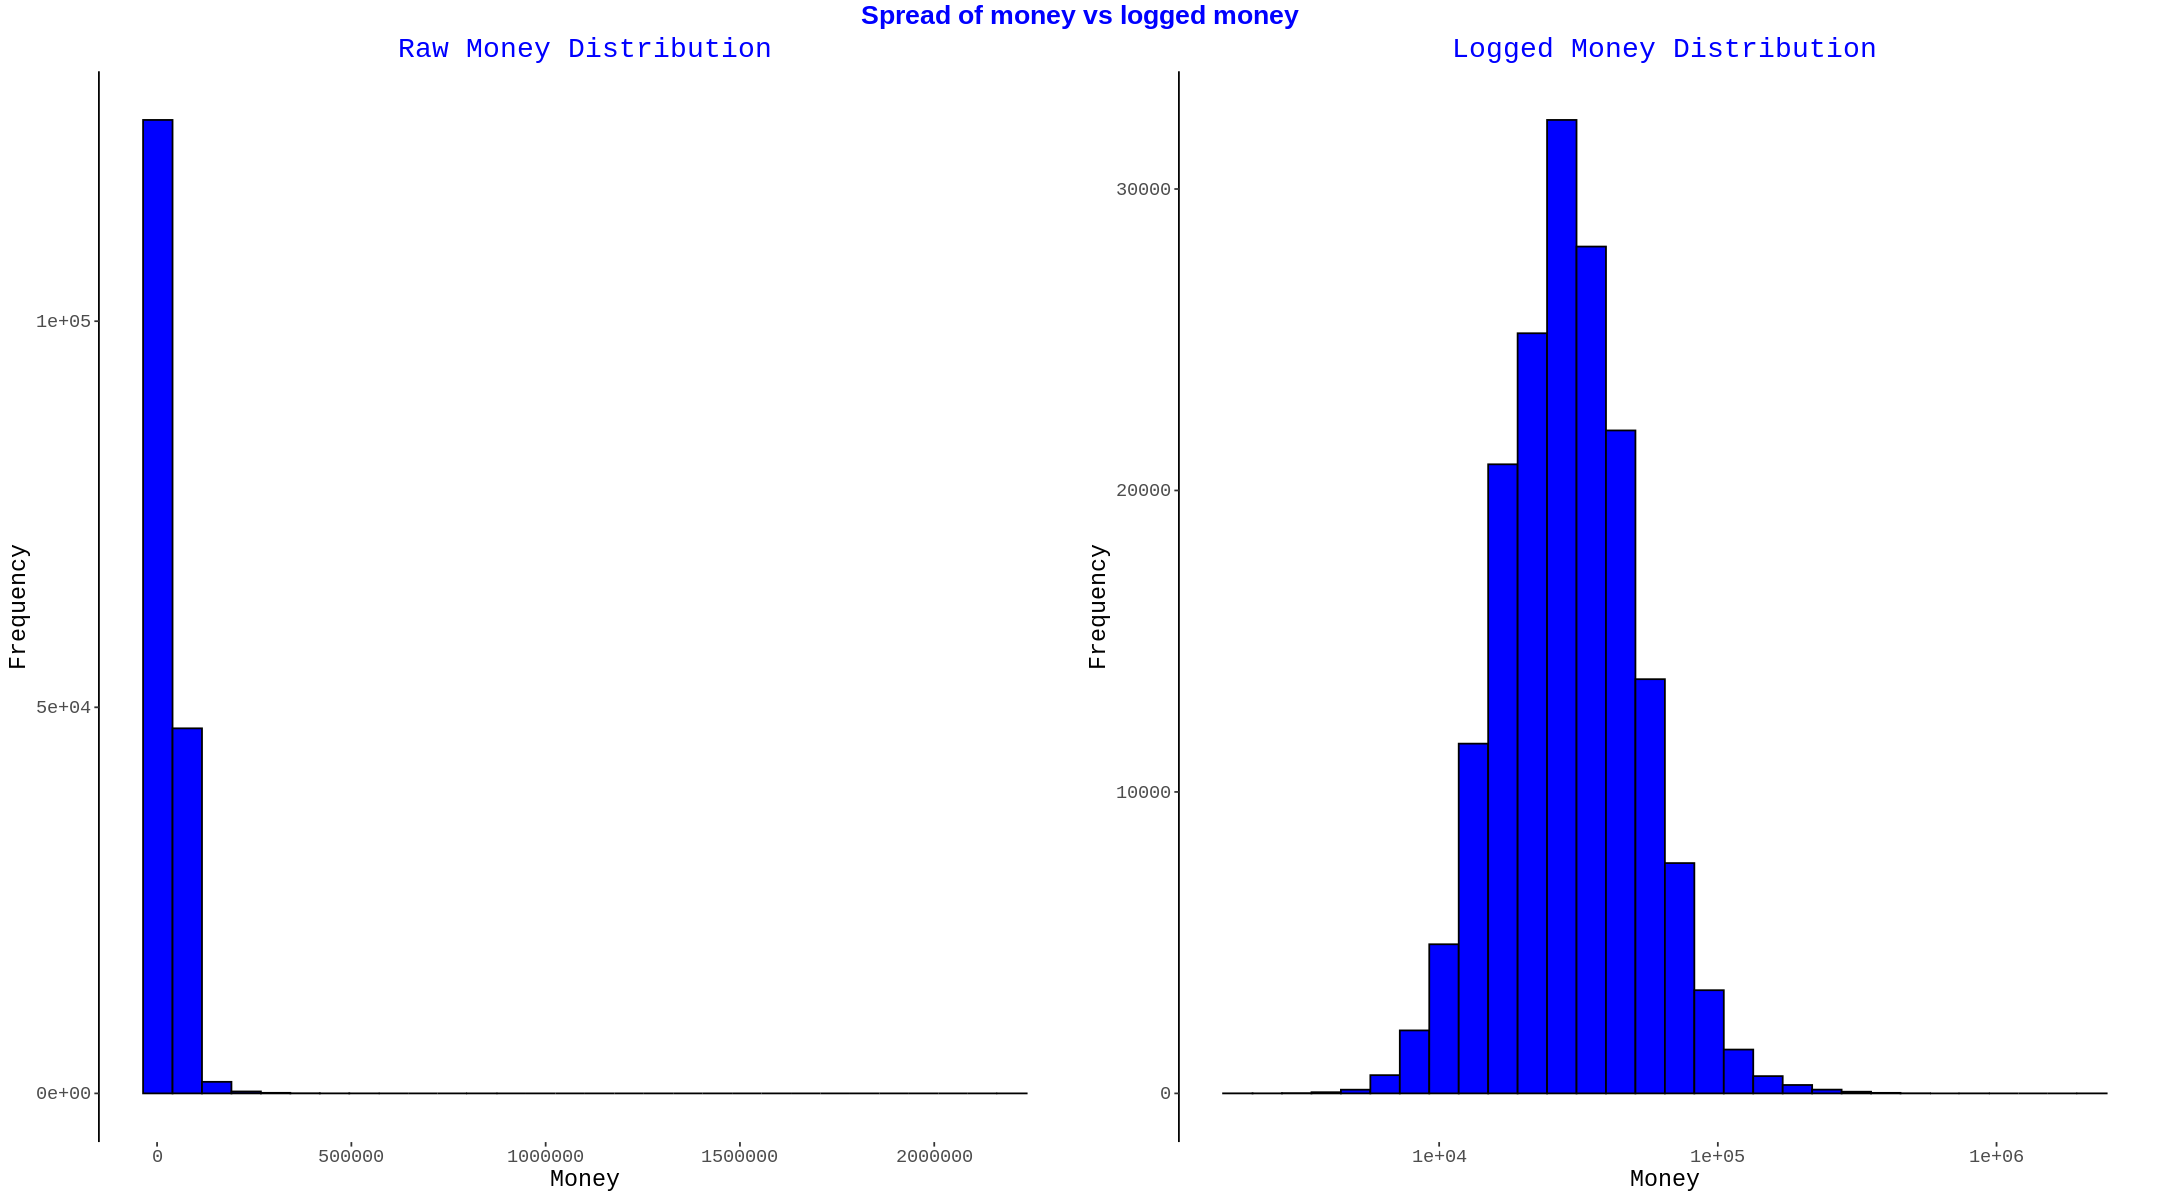

In [23]:
options(repr.plot.width = 18, repr.plot.height = 10)

theme_nito = theme(plot.title = element_text(hjust = 0.5, color = "blue"),
    text = element_text(family = "garamond", size = 14),
	  rect = element_blank(),
	  panel.grid = element_blank(),
	  axis.line = element_line(color = "black"))


money_charts = Car_df %>%
  ggplot(aes(money)) + theme_nito +
  theme(axis.line.x = element_blank())

raw_money = money_charts +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Raw Money Distribution",
     y = "Frequency",
     x = "Money")


logged_money = money_charts +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  scale_x_log10() +
  labs(title = "Logged Money Distribution",
     y = "Frequency",
     x = "Money")

grid.arrange(raw_money, logged_money, ncol = 2,
             top = textGrob("Spread of money vs logged money",
                            gp = gpar(fontsize = 16, col = "blue", fontface = "bold")))

## `Drivetrain` column

552 Nulls

In [24]:
drive_nulls = Car_df$Drivetrain %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", drive_nulls)

[1] "Nulls: 552"

In [25]:
# Identifying unqiue vals
drivetrain_vals = Car_df$Drivetrain %>% unique()
print(Car_df$Drivetrain %>% unique())

Car_df$Drivetrain %>% table()

[1] "Fwd" "Awd" "Rwd" NA    "4Wd"


.
  4Wd   Awd   Fwd   Rwd 
38161 62143 53799 20533 

In [26]:
mode_drive_train = mfv(Car_df$Drivetrain)

# Filtering for not null
drivetrain_notnull = Car_df$Drivetrain[] %>%
  na.omit() %>%
  unique()

# Mode imputation
Car_df = Car_df %>%
  mutate(Drivetrain = ifelse(!Drivetrain %in% drivetrain_notnull, mode_drive_train, Drivetrain))

Car_df$Drivetrain %>% table()

.
  4Wd   Awd   Fwd   Rwd 
38161 62695 53799 20533 

## `Fuel type` column

In [27]:
fuel_type_nulls = Car_df$`Fuel type` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", fuel_type_nulls)

[1] "Nulls: 1341"

In [65]:
print("Unique Fuel Types before encoding:")
original_fuel_types = Car_df$`Fuel type` %>%
  unique()

original_fuel_types %>% print()

Car_df$`Fuel type` %>% table()

[1] "Unique Fuel Types before encoding:"


Warning message:
“Unknown or uninitialised column: `Fuel type`.”


NULL


Warning message:
“Unknown or uninitialised column: `Fuel type`.”


< table of extent 0 >

In [64]:
Car_df = Car_df %>%
  mutate(Fuel_type_encoded = case_when(
    `Fuel type` == "Diesel" ~ 1,
    `Fuel type` %in% c("Gasoline", "Gasolin") ~ 2,
    `Fuel type` == "E85 Flex" ~ 3,
    `Fuel type` == "Hybrid" ~ 4,
    !is.na(`Fuel type`) ~ 0,
    is.na(`Fuel type`) ~ NA_real_
  ))

print("Car_df head with Fuel_type_encoded:")
Car_df %>% select(`Fuel type`, Fuel_type_encoded) %>% head()

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `Fuel_type_encoded = case_when(...)`.
[1mCaused by error in `case_when()`:[22m
[1m[22m[33m![39m Failed to evaluate the left-hand side of formula 1.
[1mCaused by error:[22m
[33m![39m object 'Fuel type' not found


In [63]:
fuel_encode_unique = Car_df$Fuel_type_encoded %>%
  unique() %>%
  sort()
cat("Unique values in Fuel_type_encoded after initial encoding: [",
    paste(fuel_encode_unique, collapse = ", "), "]")


na_count_encoded = Car_df$Fuel_type_encoded %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Fuel_type_encoded: %d", na_count_encoded)

Warning message:
“Unknown or uninitialised column: `Fuel_type_encoded`.”


Unique values in Fuel_type_encoded after initial encoding: [  ]

Warning message:
“Unknown or uninitialised column: `Fuel_type_encoded`.”


[1] "Number of NA values in Fuel_type_encoded: 0"

In [31]:
# Prepare data for kNN imputation:
# - Convert Fuel_type_encoded to factor for categorical imputation
# - Convert Drivetrain to factor as it's a categorical predictor
Car_df_for_imputation = Car_df %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type_encoded = as.factor(as.character(Fuel_type_encoded)) # Convert to character then factor to preserve integer levels
  ) %>%
  select(money, Mileage, Year, Drivetrain, Fuel_type_encoded)

set.seed(42)

# Perform kNN imputation. Only Fuel_type_encoded has NAs among selected columns.
imputed_data_full = knnImputation(Car_df_for_imputation, k = 5, meth = "median")

# Update the original Car_df with the imputed values
Car_df$Fuel_type_encoded = as.numeric(as.character(imputed_data_full$Fuel_type_encoded))


na_count_after_imputation = Car_df$Fuel_type_encoded %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Fuel_type_encoded after KNN imputation: %d", na_count_after_imputation)

unique_fuel_after_imputation = Car_df$Fuel_type_encoded %>%
  unique() %>%
  sort()
cat("Unique values in Fuel_type_encoded after KNN imputation: [",
    paste(unique_fuel_after_imputation, collapse = ", "), "]")


[1] "Number of NA values in Fuel_type_encoded after KNN imputation: 0"

Unique values in Fuel_type_encoded after KNN imputation: [ 0, 1, 2, 3, 4 ]

In [32]:
# Decode the numerical values back to descriptive string labels
Car_df = Car_df %>%
  mutate(Fuel_type_decoded = case_when(
    Fuel_type_encoded == 0 ~ "Other",
    Fuel_type_encoded == 1 ~ "Diesel",
    Fuel_type_encoded == 2 ~ "Gasoline",
    Fuel_type_encoded == 3 ~ "E85 Flex",
    Fuel_type_encoded == 4 ~ "Hybrid",
  ))

print("Car_df head with Fuel_type_decoded:")
Car_df %>% select(`Fuel type`, Fuel_type_encoded, Fuel_type_decoded) %>% head()

[1] "Car_df head with Fuel_type_decoded:"


Fuel type,Fuel_type_encoded,Fuel_type_decoded
<chr>,<dbl>,<chr>
Gasoline,2,Gasoline
Gasoline,2,Gasoline
Gasoline,2,Gasoline
Gasoline,2,Gasoline
Gasoline,2,Gasoline
Gasoline,2,Gasoline


In [33]:
print("Frequency table for Fuel_type_decoded:")
Car_df$Fuel_type_decoded %>% table()

[1] "Frequency table for Fuel_type_decoded:"


.
  Diesel E85 Flex Gasoline   Hybrid    Other 
    5607     5173   157520     6512      376 

In [34]:
Car_df = Car_df %>%
  select(-Fuel_type_encoded, -`Fuel type`) %>%
  rename(Fuel_type = Fuel_type_decoded)

# Verify that the column has been removed
print("Columns in Car_df after removing Fuel_type_encoded:")
Car_df %>%
  colnames() %>%
  print()

[1] "Columns in Car_df after removing Fuel_type_encoded:"
 [1] "new&used"            "name"                "money"              
 [4] "Exterior color"      "Interior color"      "Drivetrain"         
 [7] "MPG"                 "Transmission"        "Engine"             
[10] "Mileage"             "Convenience"         "Entertainment"      
[13] "Exterior"            "Safety"              "Seating"            
[16] "Accidents or damage" "Clean title"         "1-owner vehicle"    
[19] "Personal use only"   "brand"               "Year"               
[22] "Model"               "currency"            "Fuel_type"          


## `Transmission` column

755 nulls

In [39]:
trans_nulls = Car_df$Transmission %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", trans_nulls)

[1] "Nulls: 755"

In [42]:
print("Unique Transmission Types before encoding:")
original_transmission_types = Car_df$Transmission %>%
  unique()

original_transmission_types %>% print()

[1] "Unique Transmission Types before encoding:"
  [1] "Automatic Cvt"                                                   
  [2] "10-Speed Automatic"                                              
  [3] "6-Speed Manual"                                                  
  [4] "Automatic"                                                       
  [5] "Variable"                                                        
  [6] "10-Speed A/T"                                                    
  [7] "10 Speed Automatic"                                              
  [8] "6-Speed M/T"                                                     
  [9] "Continuously Variable"                                           
 [10] "Manual"                                                          
 [11] "8-Speed Automatic With Auto-Shift"                               
 [12] "9-Speed Automatic With Auto-Shift"                               
 [13] "8-Speed Dual-Clutch"                                             
 [

In [46]:
Car_df = Car_df %>%
  mutate(Transmission_encoded_temp = case_when(
    str_detect(str_to_lower(Transmission), "manual") ~ 1,
    str_detect(str_to_lower(Transmission), "automatic|auto|autostick|tiptronic|pdk|dct|geartronic|sportmatic|shiftronic") ~ 2,
    str_detect(str_to_lower(Transmission), "variable|cvt|xtronic|lineartronic|ivt|ecvt") ~ 3,
    !is.na(Transmission) ~ 0, # Map other non-NA strings to 0
    is.na(Transmission) ~ NA_real_
  ))

print("Car_df head with Transmission_encoded_temp:")
Car_df %>%
  select(Transmission, Transmission_encoded_temp) %>%
  head()

[1] "Car_df head with Transmission_encoded_temp:"


Transmission,Transmission_encoded_temp
<chr>,<dbl>
Automatic Cvt,2
10-Speed Automatic,2
6-Speed Manual,1
10-Speed Automatic,2
10-Speed Automatic,2
10-Speed Automatic,2


In [47]:
Car_df = Car_df %>%
  mutate(Transmission_for_imputation = ifelse(
    Transmission_encoded_temp == 0 | is.na(Transmission_encoded_temp),
    NA_real_,
    Transmission_encoded_temp
  ))

Car_df %>%
  select(Transmission, Transmission_encoded_temp, Transmission_for_imputation) %>%
  head()

print("Unique values in Transmission_for_imputation:")
Car_df$Transmission_for_imputation %>%
  unique() %>%
  sort()

na_count_imputation = Car_df$Transmission_for_imputation %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Transmission_for_imputation: %d", na_count_imputation)

[1] "Car_df head with Transmission_encoded_temp and Transmission_for_imputation:"


Transmission,Transmission_encoded_temp,Transmission_for_imputation
<chr>,<dbl>,<dbl>
Automatic Cvt,2,2
10-Speed Automatic,2,2
6-Speed Manual,1,1
10-Speed Automatic,2,2
10-Speed Automatic,2,2
10-Speed Automatic,2,2


[1] "Unique values in Transmission_for_imputation:"


[1] 1 2 3

[1] "Number of NA values in Transmission_for_imputation: 7476"

In [48]:
Car_df_for_transmission_imputation = Car_df %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type = as.factor(Fuel_type),
    Transmission_for_imputation = as.factor(as.character(Transmission_for_imputation))
  ) %>%
  select(money, Mileage, Year, Drivetrain, Fuel_type, Transmission_for_imputation)

set.seed(42)

imputed_transmission_data = knnImputation(Car_df_for_transmission_imputation, k = 5, meth = "median")

Car_df$Transmission_imputed = as.numeric(as.character(imputed_transmission_data$Transmission_for_imputation))

na_count_after_imputation = Car_df$Transmission_imputed %>%
  is.na() %>%
  sum()
sprintf("Number of NA values in Transmission_imputed after KNN imputation: %d", na_count_after_imputation)

unique_transmission_after_imputation = Car_df$Transmission_imputed %>%
  unique() %>%
  sort()
cat("Unique values in Transmission_imputed after KNN imputation: [", paste(unique_transmission_after_imputation, collapse = ", "), "]")

[1] "Number of NA values in Transmission_imputed after KNN imputation: 0"

Unique values in Transmission_imputed after KNN imputation: [ 1, 2, 3 ]

In [49]:
Car_df = Car_df %>%
  mutate(Transmission_decoded = case_when(
    Transmission_imputed == 1 ~ "Manual",
    Transmission_imputed == 2 ~ "Automatic",
    Transmission_imputed == 3 ~ "Variable",
  ))

print("Car_df head with Transmission_imputed and Transmission_decoded:")
Car_df %>%
  select(Transmission_imputed, Transmission_decoded) %>%
  head()

[1] "Car_df head with Transmission_imputed and Transmission_decoded:"


Transmission_imputed,Transmission_decoded
<dbl>,<chr>
2,Automatic
2,Automatic
1,Manual
2,Automatic
2,Automatic
2,Automatic


In [50]:
Car_df = Car_df %>%
  select(-Transmission, -Transmission_encoded_temp, -Transmission_for_imputation, -Transmission_imputed) %>%
  rename(Transmission = Transmission_decoded)

print("Columns in Car_df after updating Transmission and removing intermediate columns:")
Car_df %>%
  colnames() %>%
  print()

print("Frequency table for the updated Transmission column:")
Car_df$Transmission %>%
  table()

[1] "Columns in Car_df after updating Transmission and removing intermediate columns:"
 [1] "new&used"            "name"                "money"              
 [4] "Exterior color"      "Interior color"      "Drivetrain"         
 [7] "MPG"                 "Engine"              "Mileage"            
[10] "Convenience"         "Entertainment"       "Exterior"           
[13] "Safety"              "Seating"             "Accidents or damage"
[16] "Clean title"         "1-owner vehicle"     "Personal use only"  
[19] "brand"               "Year"                "Model"              
[22] "currency"            "Fuel_type"           "Transmission"       
[1] "Frequency table for the updated Transmission column:"


.
Automatic    Manual  Variable 
   168605      4429      2154 

## `Engine` column

330 nulls

In [52]:
engine_nulls = Car_df$Engine %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", engine_nulls)

[1] "Nulls: 330"

In [ ]:
print("Unique values in the 'Engine' column:")
Car_df$Engine %>% unique() %>% print()

In [58]:
Car_df = Car_df %>%
  filter(!is.na(Engine))

engine_nulls_after = Car_df$Engine %>%
  is.na() %>%
  sum()

sprintf("Nulls in Engine column after removal: %d", engine_nulls_after)

[1] "Nulls in 'Engine' column after removal: 0"

In [61]:
Car_df = Car_df %>%
  mutate(
    # Refine regex to capture Engine Size (e.g., 1.5L, 3.5L, 2.0 Liter)
    Engine_Size = as.numeric(str_extract(`Engine`, "\\d+\\.\\d+(?=\\s*(L|Liter))|\\d+(?=\\s*(L|Liter))")),
    # Extract Cylinder Configuration (e.g., I4, V6, H6, 4-Cylinder)
    Cylinder_Configuration = case_when(
      str_detect(`Engine`, "(?i)I-?3|3.?Cylinder") ~ "I3",
      str_detect(`Engine`, "(?i)I-?4|4.?Cylinder") ~ "I4",
      str_detect(`Engine`, "(?i)I-?5|5.?Cylinder") ~ "I5",
      str_detect(`Engine`, "(?i)I-?6|6.?Cylinder") ~ "I6",
      str_detect(`Engine`, "(?i)V-?6") ~ "V6",
      str_detect(`Engine`, "(?i)V-?8") ~ "V8",
      str_detect(`Engine`, "(?i)V-?10") ~ "V10",
      str_detect(`Engine`, "(?i)V-?12") ~ "V12",
      str_detect(`Engine`, "(?i)H-?4|Flat.?4") ~ "H4",
      str_detect(`Engine`, "(?i)H-?6|Flat.?6") ~ "H6",
      TRUE ~ "Other/Unknown"
    )
  )

# Count missing values for new columns
print("Missing values in new columns:")
Car_df %>%
  summarise(
    NA_Engine_Size = sum(is.na(Engine_Size)),
    NA_Cylinder_Configuration = sum(is.na(Cylinder_Configuration))
  ) %>% print()

.
    0  0.65     1   1.2   1.3   1.4   1.5   1.6   1.8     2   2.1   2.2   2.3 
   20     1    12   573   529  2716  4465  3335  3860 34448    46     7   942 
  2.4   2.5   2.7   2.8   2.9     3   3.2   3.3   3.4   3.5   3.6   3.7   3.8 
10475 15106  1449    51   297 11174   531   932    49 16232 21775  1347  1373 
    4   4.2   4.3   4.4   4.6   4.7   4.8     5   5.2   5.3   5.4   5.5   5.6 
 2404    46   191  1087   639   543   234  1635   122  4170   120   234  1946 
  5.7   5.8     6   6.2   6.4   6.6   6.7     7   7.3   8.4 
 5285     3   439  3473  1533  1124  2203     7    46     9 
[1] "Car_df head with extracted Engine_Size and Cylinder_Configuration:"


Engine,Engine_Size,Cylinder_Configuration
<chr>,<dbl>,<chr>
1.5L I4 16V Gdi Dohc Turbo,1.5,I4
3.5L V6 24V Gdi Sohc,3.5,V6
1.5L I4 16V Gdi Dohc Turbo,1.5,I4
2.0L I4 16V Gdi Dohc Turbo,2.0,I4
2.0L I4 16V Gdi Dohc Turbo,2.0,I4
3.5L V6 24V Gdi Sohc,3.5,V6


[1] "Missing values in new columns:"
# A tibble: 1 × 2
  NA_Engine_Size NA_Cylinder_Configuration
           <int>                     <int>
1          15620                         0


In [62]:
Car_df = Car_df %>%
  mutate(
    Has_Turbo = ifelse(str_detect(str_to_lower(Engine), "turbo|twin turbo"), 1, 0),
    Has_GDI = ifelse(str_detect(str_to_lower(Engine), "gdi|direct injection|pdi"), 1, 0),
    Has_DOHC = ifelse(str_detect(str_to_lower(Engine), "dohc"), 1, 0),
    Has_Supercharged = ifelse(str_detect(str_to_lower(Engine), "supercharged"), 1, 0)
  )

# Display the first few rows with the new columns
print("Car_df head with extracted engine technology indicators:")
Car_df %>%
  select(Engine, Engine_Size, Cylinder_Configuration, Has_Turbo, Has_GDI, Has_DOHC, Has_Supercharged) %>%
  head()

# Count missing values for new columns
print("Missing values in new technology columns:")
Car_df %>%
  summarise(
    NA_Has_Turbo = sum(is.na(Has_Turbo)),
    NA_Has_GDI = sum(is.na(Has_GDI)),
    NA_Has_DOHC = sum(is.na(Has_DOHC)),
    NA_Has_Supercharged = sum(is.na(Has_Supercharged))
  ) %>%
  print()


[1] "Car_df head with extracted engine technology indicators:"


Engine,Engine_Size,Cylinder_Configuration,Has_Turbo,Has_GDI,Has_DOHC,Has_Supercharged
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1.5L I4 16V Gdi Dohc Turbo,1.5,I4,1,1,1,0
3.5L V6 24V Gdi Sohc,3.5,V6,0,1,0,0
1.5L I4 16V Gdi Dohc Turbo,1.5,I4,1,1,1,0
2.0L I4 16V Gdi Dohc Turbo,2.0,I4,1,1,1,0
2.0L I4 16V Gdi Dohc Turbo,2.0,I4,1,1,1,0
3.5L V6 24V Gdi Sohc,3.5,V6,0,1,0,0


[1] "Missing values in new technology columns:"
# A tibble: 1 × 4
  NA_Has_Turbo NA_Has_GDI NA_Has_DOHC NA_Has_Supercharged
         <int>      <int>       <int>               <int>
1            0          0           0                   0


In [72]:
Car_df_for_engine_imputation = Car_df %>%
  mutate(
    Drivetrain = as.factor(Drivetrain),
    Fuel_type = as.factor(Fuel_type),
    Transmission = as.factor(Transmission),
    Cylinder_Configuration = as.factor(Cylinder_Configuration)
  ) %>%
  select(money, Mileage, Year, Engine_Size, Drivetrain, Fuel_type, Transmission, Cylinder_Configuration)

print("Structure of Car_df_for_engine_imputation:")
Car_df_for_engine_imputation %>% str()

n_nulls_engine_size = Car_df_for_engine_imputation %>%
  filter(is.na(Engine_Size)) %>%
  count() %>%
  pull(n)
sprintf("Row count of NA in Engine_Size: %d", n_nulls_engine_size)


[1] "Structure of Car_df_for_engine_imputation:"
tibble [174,858 × 8] (S3: tbl_df/tbl/data.frame)
 $ money                 : num [1:174858] 33095 61745 38095 47995 47995 ...
 $ Mileage               : num [1:174858] 5 0 5 11 2 4 19 2 2 20 ...
 $ Year                  : int [1:174858] 2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 ...
 $ Engine_Size           : num [1:174858] 1.5 3.5 1.5 2 2 3.5 3.5 1.5 2 3.5 ...
 $ Drivetrain            : Factor w/ 4 levels "4Wd","Awd","Fwd",..: 3 2 3 3 3 2 2 3 3 2 ...
 $ Fuel_type             : Factor w/ 5 levels "Diesel","E85 Flex",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Transmission          : Factor w/ 3 levels "Automatic","Manual",..: 1 1 2 1 1 1 1 2 1 1 ...
 $ Cylinder_Configuration: Factor w/ 11 levels "H4","H6","I3",..: 4 10 4 4 4 10 10 4 4 10 ...


[1] "Row count of NA in Engine_Size: 15620"

In [73]:
set.seed(42)
imputed_engine_data = knnImputation(Car_df_for_engine_imputation, k = 5, meth = "median")

# Update the original Car_df with the imputed values
Car_df$Engine_Size = imputed_engine_data$Engine_Size

na_count_after_imputation = Car_df$Engine_Size %>% is.na() %>% sum()
sprintf("Number of NA values in Engine_Size after KNN imputation: %d", na_count_after_imputation)

print("Car_df head with imputed Engine_Size:")
Car_df %>% select(Engine_Size, Cylinder_Configuration) %>% head()

[1] "Number of NA values in Engine_Size after KNN imputation: 0"

[1] "Car_df head with imputed Engine_Size:"


Engine,Engine_Size,Cylinder_Configuration
<chr>,<dbl>,<chr>
1.5L I4 16V Gdi Dohc Turbo,1.5,I4
3.5L V6 24V Gdi Sohc,3.5,V6
1.5L I4 16V Gdi Dohc Turbo,1.5,I4
2.0L I4 16V Gdi Dohc Turbo,2.0,I4
2.0L I4 16V Gdi Dohc Turbo,2.0,I4
3.5L V6 24V Gdi Sohc,3.5,V6


In [77]:
Car_df = Car_df %>% select(-Engine)

print("Columns in Car_df after removing the 'Engine' column:")
Car_df %>% colnames() %>% print()

[1] "Columns in Car_df after removing the 'Engine' column:"
 [1] "new&used"               "name"                   "money"                 
 [4] "Exterior color"         "Interior color"         "Drivetrain"            
 [7] "MPG"                    "Mileage"                "Convenience"           
[10] "Entertainment"          "Exterior"               "Safety"                
[13] "Seating"                "Accidents or damage"    "Clean title"           
[16] "1-owner vehicle"        "Personal use only"      "brand"                 
[19] "Year"                   "Model"                  "currency"              
[22] "Fuel_type"              "Transmission"           "Engine_Size"           
[25] "Cylinder_Configuration" "Has_Turbo"              "Has_GDI"               
[28] "Has_DOHC"               "Has_Supercharged"      


## `Accidents or damage` column

52164 nulls

In [105]:
accidents_null = Car_df$`Accidents or damage` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", accidents_null)

[1] "Nulls: 0"

In [96]:
Car_df$`Accidents or damage` %>% table()

.
At Least 1 Accident Or Damage Reported                          None Reported 
                                 32687                                  90229 

In [103]:
# Encoding accidents as 1, the rest 0
Car_df = Car_df %>%
  mutate(`Accidents or damage` = as.integer(ifelse(`Accidents or damage` == "None Reported" | is.na(`Accidents or damage`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df$`Accidents or damage` %>% table()

.
     0      1 
142803  32687 

## `Clean Title`

157340 nulls god damn

In [106]:
clean_null = Car_df$`Clean title` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", clean_null)

[1] "Nulls: 157340"

In [107]:
Car_df$`Clean title` %>% table()

.
   No   Yes 
  294 17856 

In [108]:
# Encoding accidents as 1, the rest 0
Car_df = Car_df %>%
  mutate(`Clean title` = as.integer(ifelse(`Clean title` == "No" | is.na(`Clean title`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df$`Clean title` %>% table()

[1] "After encoding and handling missing values:"


.
     0      1 
142803  32687 

## `1-owner vechile` column

52799 nulls

In [109]:
owner_null = Car_df$`1-owner vehicle` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", owner_null)

[1] "Nulls: 52799"

In [111]:
Car_df$`1-owner vehicle` %>% table()

.
   No   Yes 
61085 61606 

In [113]:
# Encoding accidents as 1, the rest 0
Car_df = Car_df %>%
  mutate(`1-owner vehicle` = as.integer(ifelse(`1-owner vehicle` == "No" | is.na(`1-owner vehicle`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df$`1-owner vehicle` %>% table()

[1] "After encoding and handling missing values:"


.
     0      1 
113884  61606 

## `Personal use only` column

52575 nulls

In [114]:
personal_null = Car_df$`Personal use only` %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", personal_null)

[1] "Nulls: 52575"

In [115]:
Car_df$`Personal use only` %>% table()

.
   No   Yes 
39369 83546 

In [116]:
# Encoding accidents as 1, the rest 0
Car_df = Car_df %>%
  mutate(`Personal use only` = as.integer(ifelse(`Personal use only` == "No" | is.na(`Personal use only`) , 0, 1)))

print("After encoding and handling missing values:")
Car_df$`Personal use only` %>% table()

[1] "After encoding and handling missing values:"


.
    0     1 
91944 83546 

## `Model` column

The focus for this column is to match it with rates dataset to join them later

In [119]:
model_nulls =Car_df$Model %>%
  is.na() %>%
  sum()

sprintf("Nulls: %d", model_nulls)

[1] "Nulls: 0"

In [121]:
Car_df = Car_df %>%
  mutate(Model = toupper(Model))

Car_df$Model %>%
  unique() %>%
  print()

   [1] "INTEGRA BASE"                                                                             
   [2] "MDX A-SPEC"                                                                               
   [3] "INTEGRA A-SPEC TECHNOLOGY"                                                                
   [4] "TLX A-SPEC"                                                                               
   [5] "MDX TECHNOLOGY"                                                                           
   [6] "RDX A-SPEC"                                                                               
   [7] "MDX BASE"                                                                                 
   [8] "TLX TYPE S"                                                                               
   [9] "RDX A-SPEC ADVANCE"                                                                       
  [10] "RDX A-SPEC ADVANCE PACKAGE"                                                               
  [11] "MD

# EDA

use `+ theme_nito` after every `ggplot()` to style it up

# Regression